In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generation Logic

### Generate Patches:

- Patch A: Top-left 2x4 patch with values from N(1, 0.5).
- Patch B: 50% chance to be 0.8 * Patch A + noise (correlated) or random N(0, 0.5) (uncorrelated), placed at the bottom-right

### Attention Weight:

- Flatten both patches and compute their dot product.

- Scale by sqrt(8) and apply sigmoid to get attention weight between 0 and 1.

### Label:

- Label = 1 if:

    - Sum of Patch A > t1

    - Sum of Patch B > t2

    - Attention weight > t3
- Else Label = 0.

In [2]:
def generate_sample(t1=5.0, t2=5.0, t3=0.8):
    # Initialize 9x9 image
    # image = np.random.normal(0, 0.5, (9, 9))
    image = np.zeros((9, 9))
    
    # Generate Patch A (top-left 2x4)
    patchA = np.random.normal(1, 0.5, (2, 4))
    image[0:2, 0:4] = patchA
    
    # Generate Patch B (bottom-right 2x4)
    if np.random.rand() > 0.5:
        # Correlated: scaled PatchA with noise
        patchB = 0.8 * patchA + np.random.normal(0, 0.1, (2, 4))
    else:
        # Uncorrelated: random noise
        patchB = np.random.normal(0, 0.5, (2, 4))
    image[5:7, 5:9] = patchB
    
    # Compute attention weight
    a_flat = patchA.flatten()
    b_flat = patchB.flatten()
    dot_product = np.dot(a_flat, b_flat)
    scaled_dot = dot_product / np.sqrt(8)  # sqrt of patch size (8 elements)
    attention_weight = 1 / (1 + np.exp(-scaled_dot))  # sigmoid
    
    # Compute sums
    sumA = np.sum(patchA)
    sumB = np.sum(patchB)
    
    # Determine label
    label = 1 if (sumA > t1) and (sumB > t2) and (attention_weight > t3) else 0


    # Name each cell
    cell_names = np.zeros((9, 9), dtype=object)
    cell_names[0:2, 0:4] = np.array([f'A_{i}' for i in range(1, 9)]).reshape(2, 4)
    cell_names[5:7, 5:9] = np.array([f'B_{i}' for i in range(1, 9)]).reshape(2, 4)


    return image, label, cell_names

def generate_dataset(num_samples=1000, t1=5.0, t2=5.0, t3=0.8):
    X = []
    y = []
    for _ in range(num_samples):
        img, label, cell_names = generate_sample(t1, t2, t3)
        X.append(img)
        y.append(label)
    return np.array(X), np.array(y), cell_names



### Generating and saving

In [3]:
# Example usage
X, y, cell_names = generate_dataset(num_samples=1000)
print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")
print(f"Class distribution: {np.bincount(y)}")


## Saving dataset
np.save('../Dataset/Synthetic/synthetic_dataset_dti.npy', X)
np.save('../Dataset/Synthetic/synthetic_labels_dti.npy', y)
np.save('../Dataset/Synthetic/synthetic_cell_names_dti.npy', cell_names)

Dataset shape: (1000, 9, 9), Labels shape: (1000,)
Class distribution: [566 434]


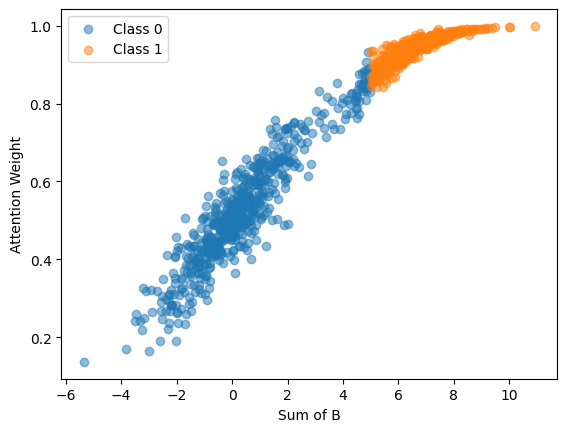

: 

In [ ]:
## Plot attention values vs values of sum of A

sumB_values = []
attention_values = []
for i in range(X.shape[0]):
    img = X[i]
    patchA = img[0:2, 0:4]
    patchB = img[5:7, 5:9]
    a_flat = patchA.flatten()
    b_flat = patchB.flatten()
    dot_product = np.dot(a_flat, b_flat)
    scaled_dot = dot_product / np.sqrt(8)  # sqrt of patch size (8 elements)
    attention_weight = 1 / (1 + np.exp(-scaled_dot))  # sigmoid
    attention_values.append(attention_weight)
    sumB = np.sum(patchB)
    sumB_values.append(sumB)

attention_values = np.array(attention_values)
sumB_values = np.array(sumB_values)

plt.scatter(sumB_values[y == 0], attention_values[y == 0], alpha=0.5, label='Class 0')
plt.scatter(sumB_values[y == 1], attention_values[y == 1], alpha=0.5, label='Class 1')

plt.xlabel('Sum of B')
plt.ylabel('Attention Weight')
plt.legend()
plt.show()

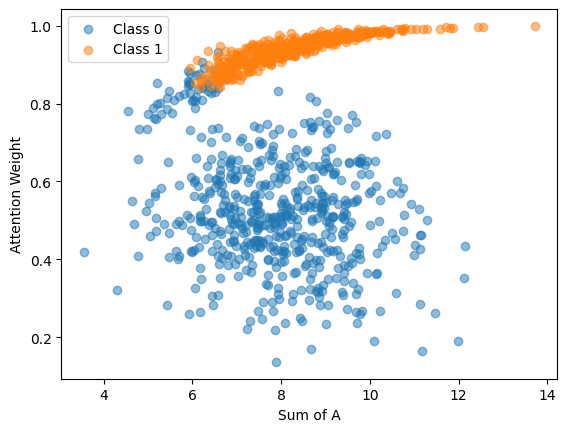

In [7]:
## Plot attention values vs values of sum of A

sumA_values = []
attention_values = []
for i in range(X.shape[0]):
    img = X[i]
    patchA = img[0:2, 0:4]
    patchB = img[5:7, 5:9]
    a_flat = patchA.flatten()
    b_flat = patchB.flatten()
    dot_product = np.dot(a_flat, b_flat)
    scaled_dot = dot_product / np.sqrt(8)  # sqrt of patch size (8 elements)
    attention_weight = 1 / (1 + np.exp(-scaled_dot))  # sigmoid
    attention_values.append(attention_weight)
    sumA = np.sum(patchA)
    sumA_values.append(sumA)

attention_values = np.array(attention_values)
sumA_values = np.array(sumA_values)

plt.scatter(sumA_values[y == 0], attention_values[y == 0], alpha=0.5, label='Class 0')
plt.scatter(sumA_values[y == 1], attention_values[y == 1], alpha=0.5, label='Class 1')

plt.xlabel('Sum of A')
plt.ylabel('Attention Weight')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Label: 1')

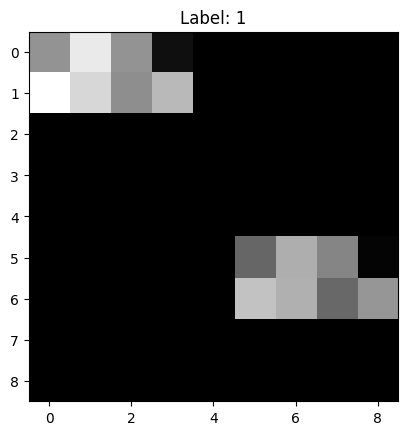

In [4]:
plt.imshow(X[5], cmap='gray')
plt.title(f"Label: {y[0]}")